In [1]:
import math

In [2]:
from scipy import misc

In [3]:
import matplotlib.pyplot as pl

In [4]:
x = [0.17453,0.52360,0.87267,1.22173,1.57080,1.91986,2.26893]
y = [0.000003,0.00018,0.00227,0.01770,0.09688,0.40481,1.37878]

In [5]:
def P(z):
    fin=0
    res = [1.]*7
    for n in range(7):
        res[n] *= y[n]
        for i in range(7):
            if i != n:
                res[n] *= (z - x[i])/(x[n] - x[i])
    for count in range(7):
        fin+=res[count]
    return(fin)

In [6]:
%matplotlib inline

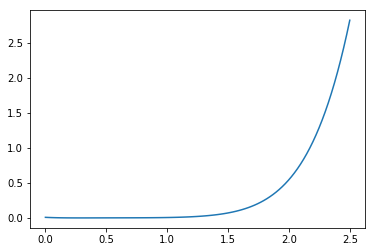

In [7]:
f_x = []
import numpy as np
z = np.linspace(0,2.5,100)
for i in z:
    f_x.append(P(i))
pl.plot(z, f_x)

In [8]:
def spline(x,y):
    a = [1.]*6
    b = [1.]*6
    c = [1.]*6
    d = [1.]*6
    for i in range(6):
        a[i] = (- misc.derivative(P, x[i+1], dx=1e-6)*x[i]**2*x[i+1]*(x[i+1]-x[i]) + y[i+1]*x[i]**2*(3*x[i+1]-x[i])+y[i]*x[i+1]**2*(x[i+1]-3*x[i]) - misc.derivative(P, x[i], dx=1e-6)*x[i]*x[i+1]**2*(x[i+1]-x[i]))/((x[i+1]-x[i])**3)
        b[i] = (misc.derivative(P, x[i+1], dx=1e-6)*x[i]*(2*x[i+1]+x[i])*(x[i+1]-x[i])-6*(y[i+1]-y[i])*x[i]*x[i+1]+ misc.derivative(P, x[i], dx=1e-6)*x[i+1]*(x[i+1]+2*x[i])*(x[i+1]-x[i]))/((x[i+1]-x[i])**3)
        c[i] = (- misc.derivative(P, x[i+1], dx=1e-6)*(x[i+1]-x[i])*(x[i+1]+2*x[i])+3*(y[i+1]-y[i])*(x[i+1]+x[i]) - misc.derivative(P, x[i], dx=1e-6)*(x[i+1]-x[i])*(x[i]+2*x[i+1]))/((x[i+1]-x[i])**3)
        d[i] = (misc.derivative(P, x[i+1], dx=1e-6)*(x[i+1]-x[i])-2*(y[i+1]-y[i]) +misc.derivative(P, x[i], dx=1e-6)*(x[i+1]-x[i]))/((x[i+1]-x[i])**3)

    return a,b,c,d

In [9]:
a,b,c,d = spline(x,y)

In [11]:
def spline1(a,b,c,d,x):
    return(a[0]+b[0]*x+c[0]*x**2+d[0]*x**3)

In [12]:
def spline2(a,b,c,d,x):
    return(a[1]+b[1]*x+c[1]*x**2+d[1]*x**3)

In [13]:
def spline3(a,b,c,d,x):
    return(a[2]+b[2]*x+c[2]*x**2+d[2]*x**3)

In [14]:
def spline4(a,b,c,d,x):
    return(a[3]+b[3]*x+c[3]*x**2+d[3]*x**3)

In [15]:
def spline5(a,b,c,d,x):
    return(a[4]+b[4]*x+c[4]*x**2+d[4]*x**3)

In [16]:
def spline6(a,b,c,d,x):
    return(a[5]+b[5]*x+c[5]*x**2+d[5]*x**3)

In [17]:
print spline1(a,b,c,d,0.52360)

0.00018


In [18]:
print spline2(a,b,c,d,0.52360)

0.00018


In [19]:
print spline2(a,b,c,d,0.87267)

0.00227


In [20]:
print spline3(a,b,c,d,0.87267)

0.00227


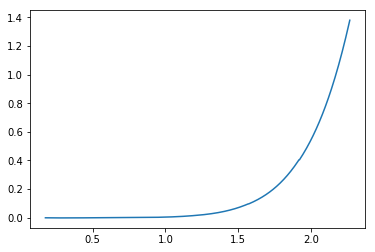

In [21]:
f_x = []
import numpy as np
l1 = np.linspace(0.17453,0.52360,100)
l2 = np.linspace(0.52360,0.87267,100)
l3 = np.linspace(0.87267,1.22173,100)
l4 = np.linspace(1.22173,1.57080,100)
l5 = np.linspace(1.57080,1.91986,100)
l6 = np.linspace(1.91986,2.26893,100)
z = np.linspace(0.17453,2.26893,600)
for i in l1:
    f_x.append(spline1(a,b,c,d,i))
for i in l2:
    f_x.append(spline2(a,b,c,d,i))
for i in l3:
    f_x.append(spline3(a,b,c,d,i))
for i in l4:
    f_x.append(spline4(a,b,c,d,i))
for i in l5:
    f_x.append(spline5(a,b,c,d,i))
for i in l6:
    f_x.append(spline6(a,b,c,d,i))
pl.plot(z, f_x)